# TP4 : Équations différentielles partielles
## PHY-3500: Physique numérique (H2021) - 2 avril 2021


Mélissa Cinq-Mars (111 179 946)

Pierre-Olivier Janvier (111 187 987)

Maxence Larose (111 188 447)

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

### L'équation de Schrödinger et la méthode de Crank-Nicolson

#### Question 1

voir exercice numéro 9.8 qui est le TP au complet dans le fond

In [18]:
""" Défintion des constantes """
hbar = const.hbar
M = const.electron_mass
L = 10**-8
h = 10**-18
N = 1000
a = L/N

""" Coefficients des matrices symétriques et tridiagonales A et B de l'équation de Crank-Nicolson"""
a1 = 1 + h*(1j*hbar / 2*M*a**2)
a2 = -h*(1j*hbar / 4*m*a**2)
b1 = 1 - h*(1j*hbar / 2*m*a**2)
b2 = h*(1j*hbar / 4*m*a**2)


"""Définition de la fonction d'onde de l'électron à t=0 """
def psi_0(x):
    x0 = L/2
    sigma = 1*10**-10   #[m]
    k = 5*10**10        #[m^-1]
    return np.exp(-((x-x0)**2)/(2*sigma**2))*np.exp(1j*k*x)


""" Définition des conditions initiales """
x = np.linspace(0, L, N+1)



""" Expression simple pour les vi """
#vi = b1*psi_i + b2*(psi_i+1 + psi_i-1)





' Expression simple pour les vi '

#### Question 2

In [19]:
""" Définition de la matrice A """



' Définition de la matrice A '

In [17]:

from __future__ import division, print_function
from os import sys
sys.path.append('cpresources')
from scipy.linalg import solve_banded
from pylab import *

h = 1e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices

a = L/N

a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
b1 =  1 - h*hbar/2/M/a**2*1j
b2 =  h*hbar*1j/4/M/a**2

ksi = zeros(N+1,complex)

def ksi0(x):
	x0 = L/2
	sigma = 1e-10
	k = 5e10
	return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

x = linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0


A = empty((3,N),complex)

A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

#==============================================================================
# for i in range(100):
# 	v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
# 	ksi[1:N] = banded(A,v,1,1)
#==============================================================================

#plot(ksi)

#==============================================================================
# Ap = zeros((N-1,N-1),complex)
# for i in range(N-2):
# 	Ap[i,i] = a2
# 	Ap[i+1,i] = a1 #Bottom
# 	Ap[i,i+1] = a1 #Right
# Ap[N-2,N-2] = a2
#==============================================================================


from visual import curve, rate

ksi_c = curve()
ksi_c.set_x(x-L/2)

#ksi = banded(A,v,1,1)
while True:
	rate(30)
	ksi_c.set_y(real(ksi)*1e-9)
	ksi_c.set_z(imag(ksi)*1e-9)	
	for i in range(20):
		v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
		ksi[1:N] = banded(A,v,1,1)



ModuleNotFoundError: No module named 'visual'

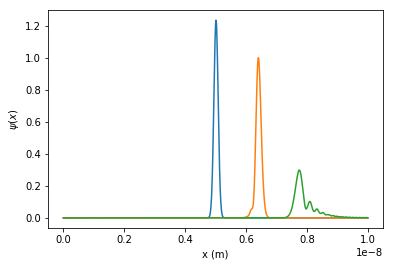

In [8]:
from scipy.linalg import solve_banded
from numpy import matmul, exp, linspace, array, zeros, empty
from pylab import plot, show, ylabel, xlabel

# Constants
m = 9.109 * 10 ** -31  # electron mass
L = 10 ** -8  # m
x0 = L / 2
sigma = 10 ** -10  # m
k = 5 * 10 ** 10  # 1/m
h_bar = 6.626 * 10 ** -34
N = 1000  # number of spatial slices
a = L / N  # spatial distance between points
h = 10 ** -18  # time step in seconds
a1 = 1 + 1j * h * h_bar / (2 * m * a ** 2)
a2 = - h * h_bar * 1j / (4 * m * a ** 2)
b1 = 1 - 1j * h * h_bar / (2 * m * a ** 2)
b2 = - a2


def psi_0(x):
    return exp(-(x - x0) ** 2 / (2 * sigma ** 2)) * exp(1j * k * x)


# initial conditions
x_points = linspace(0, L, N + 1)
psi = array(list(map(psi_0, x_points)), complex)
psi[0] = psi[N - 1] = 0

# Create the matrix A
# A = zeros([N + 1, N + 1], complex)
# A[0, 0] = a1
# A[0, 1] = a2
# A[N, N - 1] = a2
# A[N, N] = a1
# for i in range(N):
#     A[i, i - 1] = a2
#     A[i, i] = a1
#     A[i, i + 1] = a2
#
# # Create the matrix B
# B = zeros([N + 1, N + 1], complex)
# B[0, 0] = b1
# B[0, 1] = b2
# B[N, N - 1] = b2
# B[N, N] = b1
# for i in range(N):
#     B[i, i - 1] = b2
#     B[i, i] = b1
#     B[i, i + 1] = b2

# Create the matrix A in the form appropriate for the function solve_banded
A2 = empty([3, N + 1], complex)
A2[0, 0] = 0
A2[0, 1:] = a2
A2[1, :] = a1
A2[2, 0: N] = a2
A2[2, N] = 0

# Main loop
# store the wavefunction at each time step in a list
solution = [psi]
for i in range(300):
    psi[1: N] = b1 * psi[1: N] + b2 * (psi[2:] + psi[0: N - 1])
    psi = solve_banded((1, 1), A2, psi)
    solution.append(psi)

plot(x_points, abs(solution[0]) ** 2)
plot(x_points, abs(solution[49]) ** 2)
plot(x_points, abs(solution[250]) ** 2)
xlabel("x (m)")
ylabel("$\psi(x)$")
show()
